In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
#importing the data set
df = pd.read_csv("spambase.data")
df.head()
df.shape

(4600, 58)

In [43]:
with open('./spambase.names') as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
data_set= pd.read_csv('./spambase.data', header=None, names=labels +['spam'])
# spam = spamData.pop('spam')

In [44]:
# checking null values
data_set.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [45]:
# droping duplicate values
new_data = data_set.drop_duplicates()
new_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [46]:
x1 = new_data.drop(labels=['word_freq_3d','char_freq_['], axis=1)
x1.shape

(4210, 56)

In [47]:
X = x1
Y = x1.iloc[:, 55].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
# The goal of applying feature scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most machine-learning algorithms.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


array([[-0.34792164,  1.16102457,  0.67588944, ...,  0.04439849,
        -0.02130997,  1.22778048],
       [ 0.3521501 ,  0.3684328 ,  0.40439129, ...,  0.24484101,
         1.1911417 ,  1.22778048],
       [-0.14790114, -0.24802746,  0.81163851, ...,  2.16908914,
         3.18117903,  1.22778048],
       ...,
       [ 0.65218084, -0.24802746,  0.01653679, ..., -0.23120996,
        -0.27996632, -0.81447785],
       [ 2.85240628, -0.24802746, -0.56524496, ..., -0.23622103,
        -0.34463041, -0.81447785],
       [-0.34792164, -0.24802746,  0.69528216, ..., -0.23622103,
        -0.40606129, -0.81447785]])

In [49]:
df1 = pd.DataFrame(data=scaled_X , columns=X.columns)
df1

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.347922,1.161025,0.675889,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,...,-0.116407,-0.160010,-0.525294,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310,1.227780
1,0.352150,0.368433,0.404391,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,0.832571,...,-0.116407,-0.160010,-0.043936,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142,1.227780
2,-0.147901,-0.248027,0.811639,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,1.755758,...,-0.116407,-0.120407,-0.003822,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179,1.227780
3,-0.347922,-0.248027,-0.565245,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,1.375622,...,-0.116407,-0.160010,-0.025702,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.227780
4,-0.347922,-0.248027,-0.565245,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,1.375622,...,-0.116407,-0.160010,-0.032996,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.227780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,...,-0.116407,-0.160010,0.320730,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464,-0.814478
4206,-0.347922,-0.248027,-0.565245,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,...,-0.116407,-0.160010,-0.525294,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093,-0.814478
4207,0.652181,-0.248027,0.016537,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,...,-0.116407,0.243945,2.093004,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966,-0.814478
4208,2.852406,-0.248027,-0.565245,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,-0.307836,...,-0.116407,-0.160010,-0.317435,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630,-0.814478


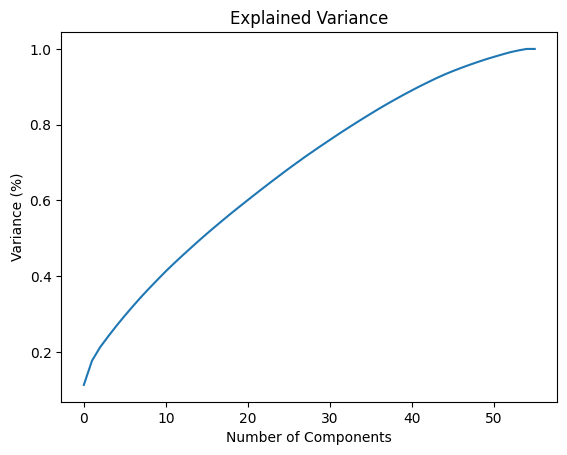

In [50]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(df1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()





In [51]:
pca = PCA(0.95)
X_pca = pca.fit_transform(df1)

In [52]:
X_pca.shape

(4210, 48)

In [53]:
principleComponents = pd.DataFrame(data =X_pca)

In [54]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principleComponents, Y, test_size = 0.25, random_state = 42)

In [55]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[590,  24],
       [ 25, 414]], dtype=int64)

In [58]:
classifier.score(X_test, y_test)

0.9534662867996201

In [59]:
# performing decision tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
predictions= dtree.predict(X_test)

In [61]:
# confusion matrix for decision tree

cm1 = confusion_matrix(y_test, predictions)
cm1

array([[576,  38],
       [ 21, 418]], dtype=int64)

In [62]:
dtree.score(X_test, y_test)



0.9439696106362773